# Step 2

In [2]:
import pandas as pd

In [3]:
# Read dataset
data = pd.read_csv("./data/student_performance_prediction_dataset.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## 1. Identify the members associated with your protected class variables and group together into a subset of membership categories as appropriate

In [23]:
data["gender"] = data["gender"].astype('category')
print(f'Gender: {data["gender"].unique()}')
data["race/ethnicity"] = data["race/ethnicity"].astype('category')
print(f'Race/Ethnicity: {data["race/ethnicity"].unique()}')

Gender: ['female', 'male']
Categories (2, object): ['female', 'male']
Race/Ethnicity: ['group D', 'group B', 'group C', 'group E', 'group A']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']


## 2. Discretize the values associated with your dependent variables into discrete categories/numerical values as appropriate

In [26]:
data["math score discrete"] = pd.cut(
    x = data["math score"],
    bins = [0, 59, 69, 79, 89, 100],
    right = True,
    labels = ["F", "D", "C", "B", "A"]
).astype("category")
print(data["math score discrete"].unique())

['F', 'A', 'C', 'B', 'D']
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [18]:
data["reading score discrete"] = pd.cut(
    x = data["reading score"],
    bins = [0, 59, 69, 79, 89, 100],
    right = True,
    labels = ["F", "D", "C", "B", "A"]
).astype("category")
print(data["reading score discrete"].unique())

['C', 'A', 'B', 'F', 'D']
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [19]:
data["writing score discrete"] = pd.cut(
    x = data["writing score"],
    bins = [0, 59, 69, 79, 89, 100],
    right = True,
    labels = ["F", "D", "C", "B", "A"]
).astype("category")
print(data["writing score discrete"].unique())

['C', 'B', 'D', 'F', 'A']
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [41]:
# Export the discretized dataset for future analysis
# data.to_csv("./data/student_performance_prediction_dataset_discrete.csv")

## 3. Compute the frequency of each membership category associated with each of your protected class variables from Step 2.1

In [20]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score discrete,reading score discrete,writing score discrete
0,female,group D,some college,standard,completed,59,70,78,F,C,C
1,male,group D,associate's degree,standard,none,96,93,87,A,A,B
2,female,group D,some college,free/reduced,none,57,76,77,F,C,C
3,male,group B,some college,free/reduced,none,70,70,63,C,C,D
4,female,group D,associate's degree,standard,none,83,85,86,B,B,B


In [29]:
data.groupby(["gender"], observed=True).size()

gender
female    492
male      508
dtype: int64

In [30]:
data.groupby(["race/ethnicity"], observed=True).size()

race/ethnicity
group A     79
group B    198
group C    323
group D    257
group E    143
dtype: int64

## 4. Create a histogram for each protected class variable that graphs the frequency values of its membership categories as a function of the dependent variables

#### Gender

<Axes: xlabel='gender'>

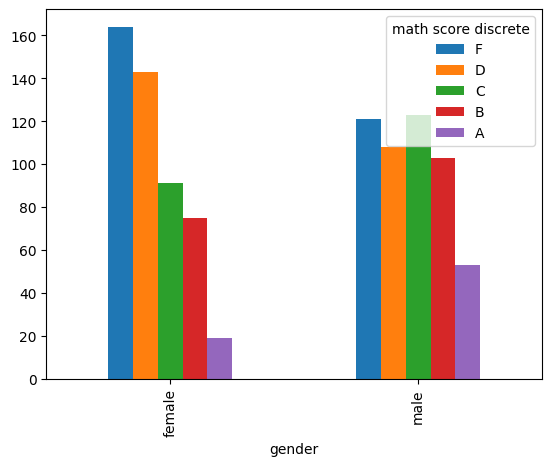

In [38]:
df_grouped = data.groupby(["gender", "math score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='gender'>

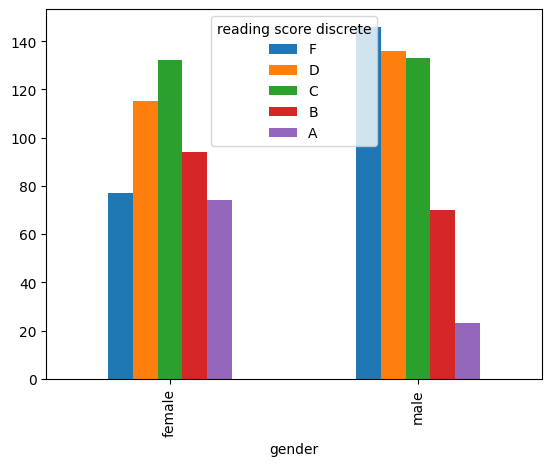

In [32]:
df_grouped = data.groupby(["gender", "reading score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='gender'>

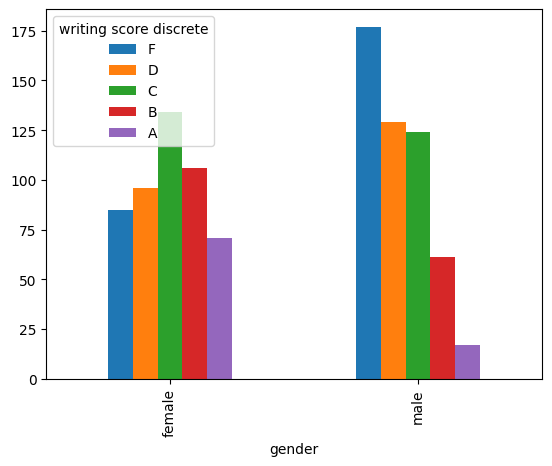

In [33]:
df_grouped = data.groupby(["gender", "writing score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

#### Race/Ethnicity

<Axes: xlabel='race/ethnicity'>

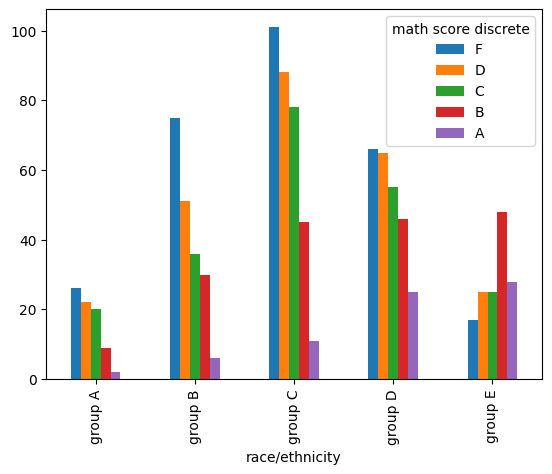

In [34]:
df_grouped = data.groupby(["race/ethnicity", "math score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='race/ethnicity'>

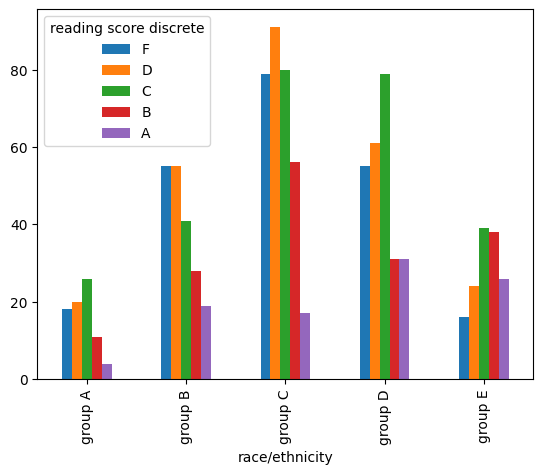

In [35]:
df_grouped = data.groupby(["race/ethnicity", "reading score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='race/ethnicity'>

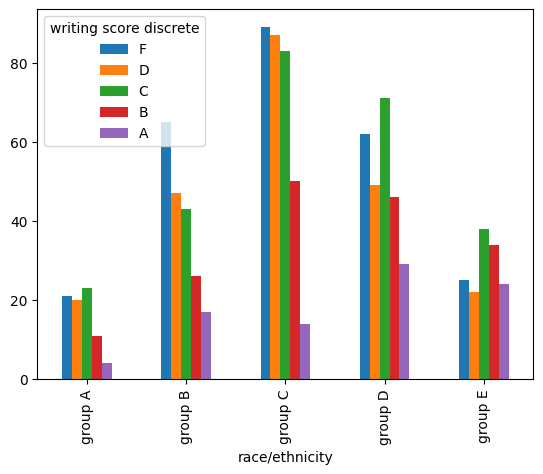

In [36]:
df_grouped = data.groupby(["race/ethnicity", "writing score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()